<a href="https://colab.research.google.com/github/tusharkumarrohilla/mammographic_masses_ids_project/blob/main/mamm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pwd

'/content'

In [7]:
!pip install numpy pandas sklearn seaborn

In [8]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns


In [9]:
input_file = 'mammographic_masses.data.txt'
masses_data = pd.read_csv(input_file,names =['BI-RADS','Age','Shape','Margin','Density','Severity'],usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')
masses_data.head(10)



,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
5,65.0,1.0,NaN,3.0,0
6,70.0,NaN,NaN,3.0,0
7,42.0,1.0,NaN,3.0,0
8,57.0,1.0,5.0,3.0,1
9,60.0,NaN,5.0,1.0,1


In [10]:
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [11]:
most_occ = pd.get_dummies(masses_data['Shape']).sum().sort_values(ascending=False).index[0]
# The above snippet makes a descending sorted array of the Embarked column and gets the first value

def replace_nan(x):
#Function to get the most occured element in case of null else returns the passed value
    if pd.isnull(x):
        return most_occ
    else:
        return x

#Mapping the dataset according to replace_nan() function
masses_data['Shape'] = masses_data['Shape'].map(replace_nan)


In [13]:
masses_data = masses_data.dropna()
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,848.000000,848.000000,848.000000,848.000000,848.000000
mean,55.838443,2.807783,2.834906,2.909198,0.483491
std,14.595728,1.241580,1.563639,0.370086,0.500022
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,46.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [15]:
# 11.7 persent data is drop  
features = list(masses_data.columns[:4])
X = masses_data[features].values

labels = list(masses_data.columns[4:])
y = masses_data[labels].values
y = y.ravel()

scaler  = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

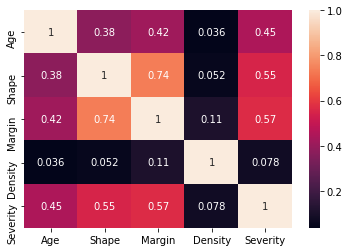

In [16]:
sns.heatmap(masses_data.corr(),annot=True)

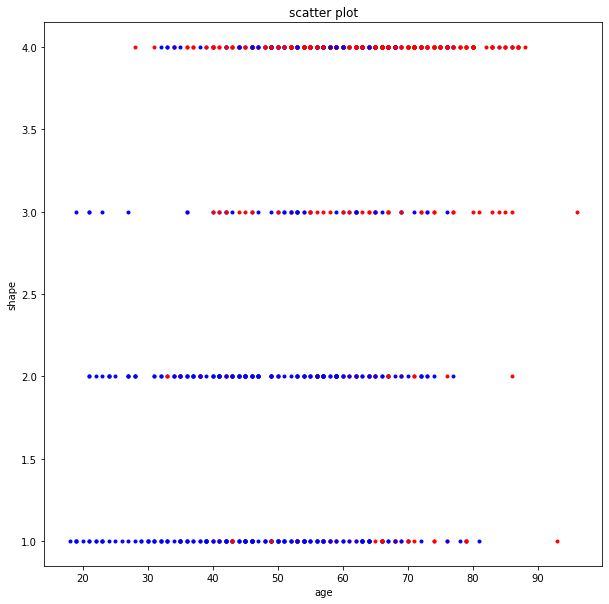

In [17]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[0], row[1], color = 'r' if row[4]==1 else 'b', marker='.')

ax.set_xlabel('age')
ax.set_ylabel('shape')
ax.set_title('scatter plot')
plt.show()

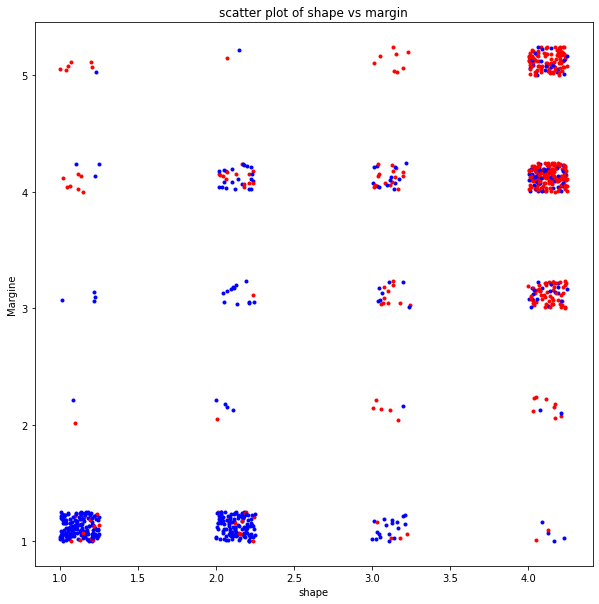

In [18]:
import random
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[1]+(random.random()*0.25),row[2]+(random.random()*0.25), color = 'r' if row[4]==1 else 'b', marker='.')
# we scatter the points plotted to visualize the values that get stacked in ( x+(0,0.25) , y+(0,0.25) ) range 

ax.set_xlabel('shape')
ax.set_ylabel('Margine')
ax.set_title('scatter plot of shape vs margin')
plt.show()

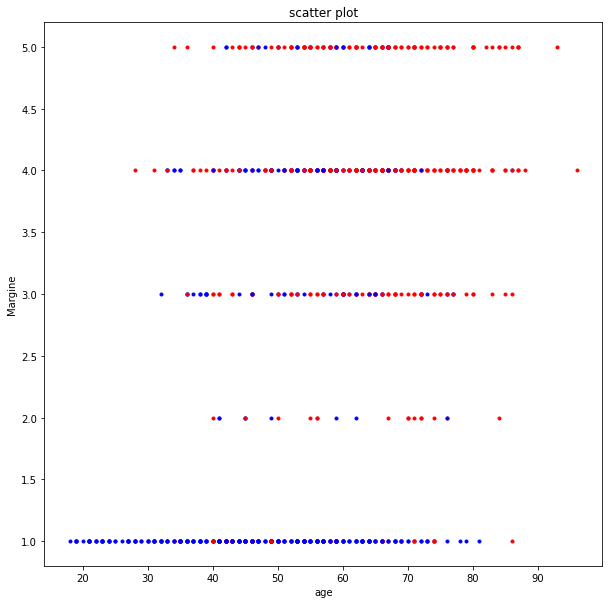

In [19]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[0], row[2], color = 'r' if row[4]==1 else 'b', marker='.')

ax.set_xlabel('age')
ax.set_ylabel('Margine')
ax.set_title('scatter plot')
plt.show()

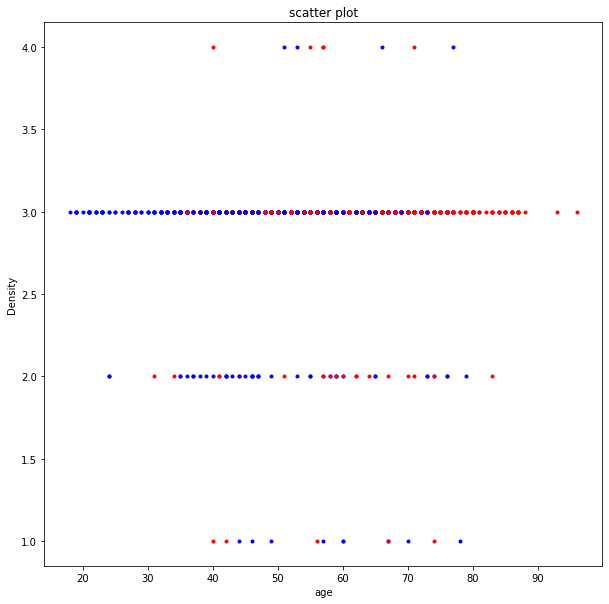

In [20]:

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

for idx, row in masses_data.iterrows():
    ax.scatter(row[0], row[3], color = 'r' if row[4]==1 else 'b', marker='.')

ax.set_xlabel('age')
ax.set_ylabel('Density')
ax.set_title('scatter plot')
plt.show()

In [21]:
clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores_lr = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores_lr)
score_mean_lr=scores_lr.mean();
print("score of LogisticRegression classifier :",scores_lr.mean())

[0.75294118 0.77647059 0.83529412 0.8        0.81176471 0.72941176
 0.76470588 0.82352941 0.85714286 0.78571429]
score of LogisticRegression classifier : 0.7936974789915965


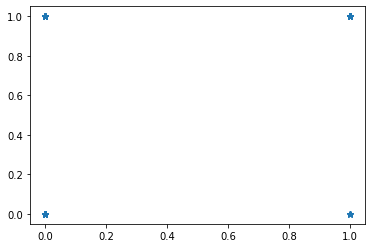

In [22]:
plt.scatter(y_test, y_pred, marker='*')

In [23]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train,y_train)
y_pred = LogisticRegressionModel.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[82 40]
 [12 78]]


In [24]:
clf.score(X_test, y_test)
svm = svm.SVC(kernel='linear', C=1)
scores_svm = model_selection.cross_val_score(svm,X,y,cv=10)
print(scores_svm)
score_mean_svm=scores_svm.mean();
print("score of svm classifier :",scores_svm.mean())

[0.70588235 0.76470588 0.82352941 0.8        0.85882353 0.72941176
 0.76470588 0.81176471 0.85714286 0.76190476]
score of svm classifier : 0.7877871148459383


In [25]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier()
DecisionTreeModel.fit(X_train,y_train)
y_pred = DecisionTreeModel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[80 42]
 [14 76]]


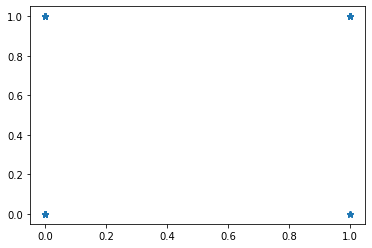

In [26]:
plt.scatter(y_test, y_pred, marker='*')

In [27]:
score_mean_decisiontree= DecisionTreeModel.score(X_test,y_test)
print("Score of Decision Tree Classifier: ", DecisionTreeModel.score (X_test,y_test))

Score of Decision Tree Classifier:  0.7358490566037735


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
scores_knn = model_selection.cross_val_score(knn,X,y,cv=10)
print(scores_knn)
score_mean_knn=scores_knn.mean();
print("score of knn classifier :",scores_knn.mean())

[0.77647059 0.77647059 0.78823529 0.76470588 0.84705882 0.75294118
 0.81176471 0.78823529 0.8452381  0.70238095]
score of knn classifier : 0.7853501400560223


In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifierModel = KNeighborsClassifier()
KNeighborsClassifierModel.fit(X_train,y_train)
y_pred = KNeighborsClassifierModel.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[83 39]
 [16 74]]


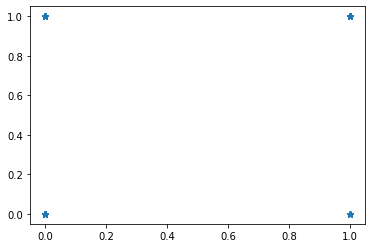

In [30]:
plt.scatter(y_test, y_pred, marker='*')

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.731


In [50]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.830
Accuracy on test set: 0.764


In [58]:
from sklearn.metrics import accuracy_score

In [63]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(848):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = accuracy_score(Y_pred_rf,y_test)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

0.7594339622641509
635


In [64]:
score_rf = accuracy_score(Y_pred_rf,y_test)

In [65]:
scores = [score_mean_lr,score_mean_knn,score_mean_svm,score_mean_decisiontree,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","svm","decisiontree","randomforest"]

for i in range(len(algorithms)):
    scores[i]=scores[i]*100
  # we substract 0.7 to visualize the data better due to very small dif
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    scores[i]=scores[i]-70

The accuracy score achieved using Logistic Regression is: 79.36974789915965 %
The accuracy score achieved using K-Nearest Neighbors is: 78.53501400560224 %
The accuracy score achieved using svm is: 78.77871148459383 %
The accuracy score achieved using decisiontree is: 73.58490566037736 %
The accuracy score achieved using randomforest is: 75.94339622641509 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


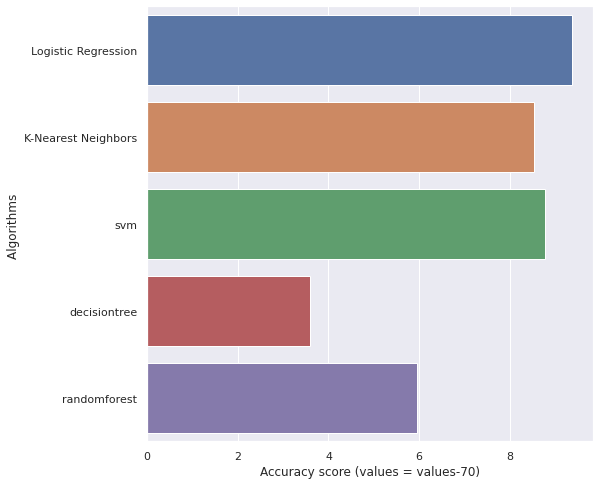

In [66]:
sns.set(rc={'figure.figsize':(8,8)})
plt.ylabel("Algorithms ")
plt.xlabel("Accuracy score (values = values-70)")
sns.barplot(scores,algorithms)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')